In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import sys
sys.path.insert(0, "C:/workspace/data-science//libs")
from simulation_core import Simulation

86400 24 3600


# Principle of work

Principle of analysis is similar to the case of classic pools, check there for more info

### Setting simulation instances that contain all required info

In [2]:
# STO token pools
xaut_weth_sim = Simulation(experiment_id = 31, x_name = 'XAUt', y_name = 'WETH', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
uma_fei_sim = Simulation(experiment_id = 32, x_name = 'UMA', y_name = 'FEI', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
perl_weth_sim = Simulation(experiment_id = 33, x_name = 'PERL', y_name = 'WETH', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
bpt_weth_sim = Simulation(experiment_id = 34, x_name = 'BPT', y_name = 'WETH', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
ustonks_usdc_sim = Simulation(experiment_id = 35, x_name = 'uSTONKS_APR_21', y_name = 'USDC', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")

# Mirrored shares tokens
mamzn_ust_sim = Simulation(experiment_id = 41, x_name = 'mAMZN', y_name = 'UST', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
mbaba_ust_sim = Simulation(experiment_id = 42, x_name = 'mBABA', y_name = 'UST', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
maapl_ust_sim = Simulation(experiment_id = 43, x_name = 'mAAPL', y_name = 'UST', window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")

### Getting original swaps dataframes

In [3]:
xaut_weth_swaps_df = xaut_weth_sim.get_original_swaps_df()
uma_fei_swaps_df = uma_fei_sim.get_original_swaps_df()
perl_weth_swaps_df = perl_weth_sim.get_original_swaps_df()
bpt_weth_swaps_df = bpt_weth_sim.get_original_swaps_df()
ustonks_usdc_swaps_df = ustonks_usdc_sim.get_original_swaps_df()

mamzn_ust_swaps_df = mamzn_ust_sim.get_original_swaps_df()
mbaba_ust_swaps_df = mbaba_ust_sim.get_original_swaps_df()
maapl_ust_swaps_df = maapl_ust_sim.get_original_swaps_df()

### Setting concatenation between original swaps dataframe and gas-related info

In [4]:
sto_pools_list = [xaut_weth_swaps_df, uma_fei_swaps_df, perl_weth_swaps_df,
                  bpt_weth_swaps_df, ustonks_usdc_swaps_df, mamzn_ust_swaps_df,
                  mbaba_ust_swaps_df, maapl_ust_swaps_df]

sto_pools_swaps_df = pd.concat(sto_pools_list)
with open('sto_pools_mevs', 'rb') as f: mevs_transactions_list = pickle.load(f)

mevs_df = pd.read_pickle('sto_pools_mevs_with_gas_df.pkl')
mevs_df['txd'] = mevs_transactions_list
mevs_df

,txd,block,block_position,gas_usage_by_tx,ether_price,tx_fee
0,0x23c2723eeb5a6186ec39c9f34b279919e941f9fb53f4...,12141124,3,"103,352","1,841.40",0.000000001
1,0x52613b563e64f3b6dd4f57f8a9b541e383717ca68e50...,12141124,0,"126,727","1,841.40",0.000000001
2,0x230718cd1083dc56ab1a18c344c672d60de018c943db...,12552368,2,"76,866","2,706.52",0
3,0xad4e7af1f274bb163f8a1b0f6855acbde840ec1c96b3...,12552368,0,"109,491","2,706.52",0
4,0xab522b2083fc2dd28262d2410642d527fb0986076f2f...,12662859,3,"110,550","2,166.61",0
...,...,...,...,...,...,...
127,0xd47fbdbbfaf30ea607c7ef83c3da8ce39457909e4dac...,13067645,4,"123,126","3,226.59",0.00000003476130489
128,0x3fd5d614c6fa5176bcc30f734eafd486ce042143cbea...,13086996,2,"133,773","3,172.57",0.000000047930125437
129,0xd29a3f30fc769bf642e0e89b903bb10c36642f8c7fa5...,13086996,0,"159,961","3,172.57",0.000000047930125437
130,0x114bfeeb481692518959ccd62933b3d890a38f97506e...,13250059,3,"180,198","3,435.76",0.00000004160346301


In [5]:
mevs_df = pd.merge(mevs_df, sto_pools_swaps_df, on='txd', how='left')

In [6]:
mevs_df['block'] = pd.to_numeric(mevs_df['block'])
mevs_df['block_position'] = pd.to_numeric(mevs_df['block_position'])
mevs_df['gas_usage_by_tx'] = pd.to_numeric(mevs_df['gas_usage_by_tx'].str.replace(',', ''))
mevs_df['ether_price'] = pd.to_numeric(mevs_df['ether_price'].str.replace(',', ''))
mevs_df['tx_fee'] = pd.to_numeric(mevs_df['tx_fee'].str.replace('wei', ''))
mevs_df['gas_price'] = pd.to_numeric(mevs_df['gas_price']) / 1000000000000000000
mevs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 131
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   txd              132 non-null    object        
 1   block            132 non-null    int64         
 2   block_position   132 non-null    int64         
 3   gas_usage_by_tx  132 non-null    int64         
 4   ether_price      132 non-null    float64       
 5   tx_fee           132 non-null    float64       
 6   token_in         132 non-null    object        
 7   token_out        132 non-null    object        
 8   amount_in        132 non-null    float64       
 9   amount_out       132 non-null    float64       
 10  amount_usd       132 non-null    float64       
 11  timestamp        132 non-null    datetime64[ns]
 12  sender           132 non-null    object        
 13  to               132 non-null    object        
 14  gas_price        132 non-null    float64  

### Correlation between features

Correlation between block number and Ether price is extremely high. There is a medium level correlation between gas price and ```amount_in``` value of transaction. ```tx_fee``` has a medium level correlation with ```amount_in``` and ```ether_price```. Those correlation are stronger compared to the case of classic tokens.

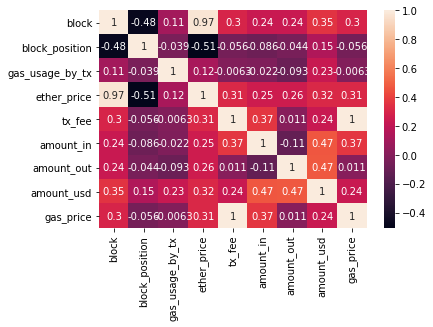

In [7]:
sns.heatmap(mevs_df[mevs_df['tx_fee'] < 0.5].corr(), annot=True)
plt.show()

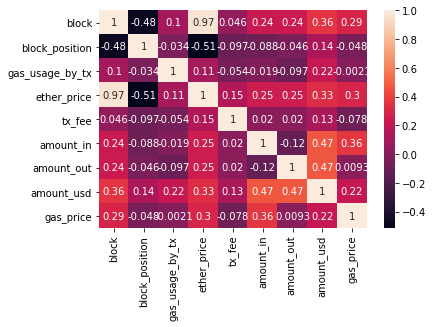

In [8]:
sns.heatmap(mevs_df.corr(), annot=True)
plt.show()

### Setting scatters of features

There is a problem with dataset of ```tx_fee``` values equal to 1 (possible source error) and therefore records with value around 1 were ignored.

There is almost no connection present between tx fee and gas usage. Can be seen that most of the records are concentrated around small values with some extreme outliers. Therefore it was decided to check connection with ether price (even considering that correlation presented in the heatmap is small).

Connection is weak and there is no observable pattern between Ether price and value with fee of the transaction.

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


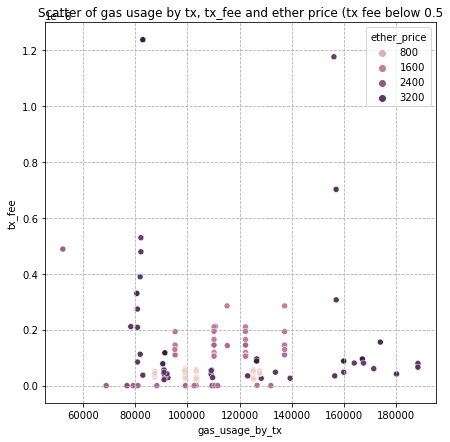

In [9]:
plt.figure(figsize=(7, 7))
sns.scatterplot(mevs_df[mevs_df['tx_fee'] < 0.5]['gas_usage_by_tx'], 
                mevs_df[mevs_df['tx_fee'] < 0.5]['tx_fee'], 
                hue=mevs_df[mevs_df['tx_fee'] < 0.5]['ether_price'])
plt.grid(True, linestyle='--')
plt.title('Scatter of gas usage by tx, tx_fee and ether price (tx fee below 0.5')
plt.show()

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


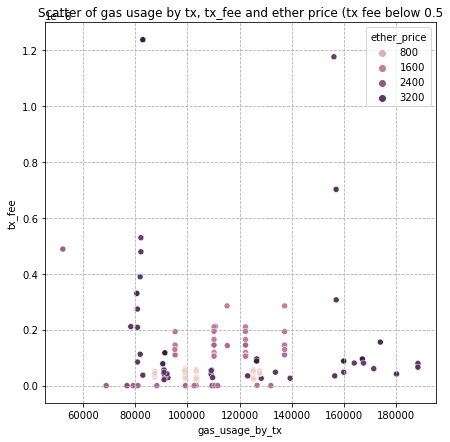

In [ ]:
plt.figure(figsize=(7, 7))
sns.scatterplot(mevs_df[mevs_df['tx_fee'] < 0.5]['gas_usage_by_tx'], 
                mevs_df[mevs_df['tx_fee'] < 0.5]['tx_fee'], 
                hue=mevs_df[mevs_df['tx_fee'] < 0.5]['ether_price'])
plt.grid(True, linestyle='--')
plt.title('Scatter of gas usage by tx, tx_fee and ether price (tx fee below 0.5')
plt.show()

In [10]:
mevs_df

,txd,block,block_position,gas_usage_by_tx,ether_price,tx_fee,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,gas_price,gas_used
0,0x23c2723eeb5a6186ec39c9f34b279919e941f9fb53f4...,12141124,3,103352,1841.40,1.000000e-09,PERL,WETH,2387.311015,0.298847,547.509240,2021-03-30 14:20:15,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0x6201b699d16cc005427d66599767e9d7e7fc12d9,1.000000e-09,200000
1,0x52613b563e64f3b6dd4f57f8a9b541e383717ca68e50...,12141124,0,126727,1841.40,1.000000e-09,WETH,PERL,0.228810,2387.311015,419.196402,2021-03-30 14:20:15,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0xf6da21e95d74767009accb145b96897ac3630bad,1.000000e-09,200000
2,0x230718cd1083dc56ab1a18c344c672d60de018c943db...,12552368,2,76866,2706.52,0.000000e+00,PERL,WETH,5532.606634,0.148980,388.215979,2021-06-02 02:36:45,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0.000000e+00,2000000
3,0xad4e7af1f274bb163f8a1b0f6855acbde840ec1c96b3...,12552368,0,109491,2706.52,0.000000e+00,WETH,PERL,0.124409,5532.606634,324.187423,2021-06-02 02:36:45,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0.000000e+00,2000000
4,0xab522b2083fc2dd28262d2410642d527fb0986076f2f...,12662859,3,110550,2166.61,0.000000e+00,WETH,PERL,0.039189,772.410414,86.271375,2021-06-19 05:12:49,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0.000000e+00,1000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0xd47fbdbbfaf30ea607c7ef83c3da8ce39457909e4dac...,13067645,4,123126,3226.59,3.476130e-08,mBABA,UST,173.356194,28453.022476,14359.231227,2021-08-21 08:48:44,0x000000000035b5e5ad9019092c665357240f594e,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,3.476130e-08,2000000
128,0x3fd5d614c6fa5176bcc30f734eafd486ce042143cbea...,13086996,2,133773,3172.57,4.793013e-08,mBABA,UST,172.461373,29687.488516,14887.187169,2021-08-24 08:38:34,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,4.793013e-08,400000
129,0xd29a3f30fc769bf642e0e89b903bb10c36642f8c7fa5...,13086996,0,159961,3172.57,4.793013e-08,UST,mBABA,29396.347291,172.461373,14741.190518,2021-08-24 08:38:34,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,4.793013e-08,400000
130,0x114bfeeb481692518959ccd62933b3d890a38f97506e...,13250059,3,180198,3435.76,4.160346e-08,UST,mBABA,26173.926024,161.265070,13079.090073,2021-09-18 13:59:02,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,4.160346e-08,270297


Most of the records are placed in the lowest left section, meaning that most of transactions are keeping a small level of gas consumption, but the most interesting moment is that all those low-value cases conform hue are having smallest ```gas_price``` values, meaning that most of the attacks are performed during low gas price. Therefore, low gas price will not cause higher transaction values (there is no strong correlation) but causes bigger MEV activity. This is similar to the case of reviewed classic tokens.

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


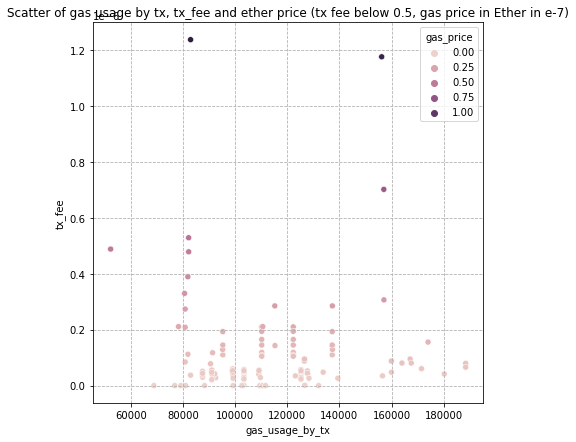

In [35]:
plt.figure(figsize=(7, 7))
sns.scatterplot(mevs_df[(mevs_df['tx_fee'] < 0.5)]['gas_usage_by_tx'], 
                mevs_df[(mevs_df['tx_fee'] < 0.5)]['tx_fee'], 
                hue=mevs_df[(mevs_df['tx_fee'] < 0.5)]['gas_price'])
plt.grid(True, linestyle='--')
plt.title('Scatter of gas usage by tx, tx_fee and ether price (tx fee below 0.5, gas price in Ether in e-7)')
plt.show()

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


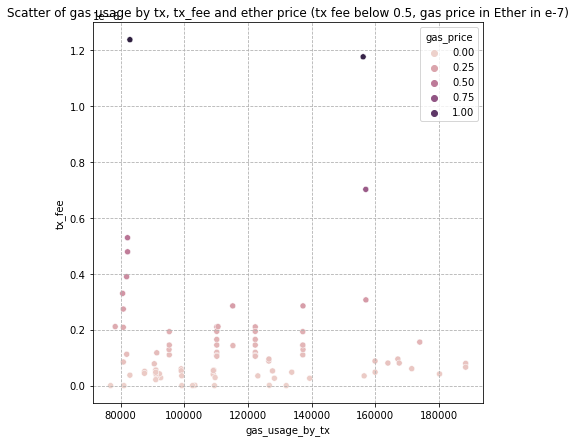

In [34]:
plt.figure(figsize=(7, 7))
sns.scatterplot(mevs_df[(mevs_df['tx_fee'] < 0.5) & (mevs_df['amount_usd'] > 300)]['gas_usage_by_tx'], 
                mevs_df[(mevs_df['tx_fee'] < 0.5) & (mevs_df['amount_usd'] > 300)]['tx_fee'], 
                hue=mevs_df[(mevs_df['tx_fee'] < 0.5) & (mevs_df['amount_usd'] > 300)]['gas_price'])
plt.grid(True, linestyle='--')
plt.title('Scatter of gas usage by tx, tx_fee and ether price (tx fee below 0.5, gas price in Ether in e-7)')
plt.show()

Out of 132 MEV transactions there are 2 transactions with incorrect ```tx_fee``` value. In case of plotting transaction with this outlier value can be seen that distribution is almost flatlined one.

In [12]:
print(len(mevs_df))

132


In [13]:
print(len(mevs_df[mevs_df['tx_fee'] > 0.5]))

2


In [36]:
print(len(mevs_df[mevs_df['amount_usd'] < 300]))

42


C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


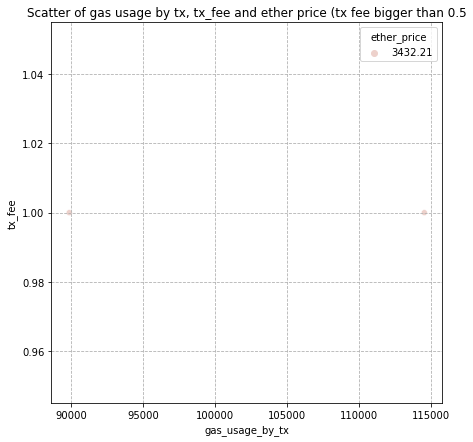

In [14]:
plt.figure(figsize=(7, 7))
sns.scatterplot(mevs_df[mevs_df['tx_fee'] > 0.5]['gas_usage_by_tx'], 
                mevs_df[mevs_df['tx_fee'] > 0.5]['tx_fee'], 
                hue=mevs_df[mevs_df['tx_fee'] > 0.5]['ether_price'])
plt.grid(True, linestyle='--')
plt.title('Scatter of gas usage by tx, tx_fee and ether price (tx fee bigger than 0.5')
plt.show()

There is no observable connection between capitalization of transactions, their fees and Ether price, but can be seen less compared to the case of classic tokens shift to the lower left part of scatter, meaning that in current case transaction fee had small impact on performed attacks.

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


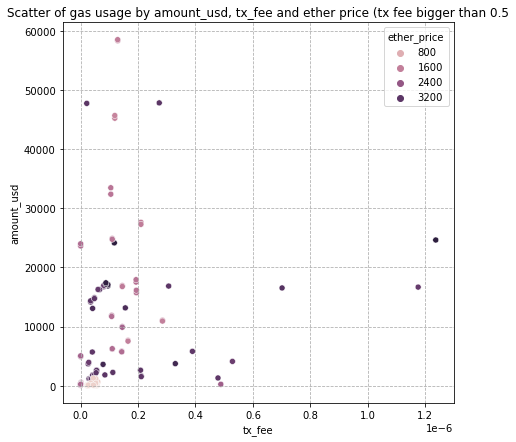

In [15]:
plt.figure(figsize=(7, 7))
sns.scatterplot(mevs_df[mevs_df['tx_fee'] < 0.5]['tx_fee'], 
                mevs_df[mevs_df['tx_fee'] < 0.5]['amount_usd'], 
                hue=mevs_df[mevs_df['tx_fee'] < 0.5]['ether_price'])
plt.grid(True, linestyle='--')
plt.title('Scatter of gas usage by amount_usd, tx_fee and ether price (tx fee bigger than 0.5')
plt.show()

Once more, all records are more concentrated on lower values of the gas price, meaning that lower gas price stimulates MEV attacks.

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


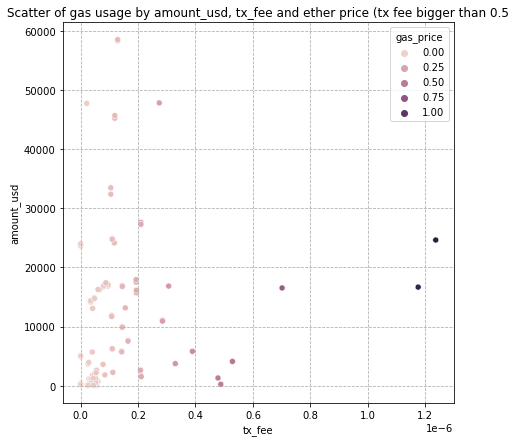

In [16]:
plt.figure(figsize=(7, 7))
sns.scatterplot(mevs_df[mevs_df['tx_fee'] < 0.5]['tx_fee'], 
                mevs_df[mevs_df['tx_fee'] < 0.5]['amount_usd'], 
                hue=mevs_df[mevs_df['tx_fee'] < 0.5]['gas_price'])
plt.grid(True, linestyle='--')
plt.title('Scatter of gas usage by amount_usd, tx_fee and ether price (tx fee bigger than 0.5')
plt.show()

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


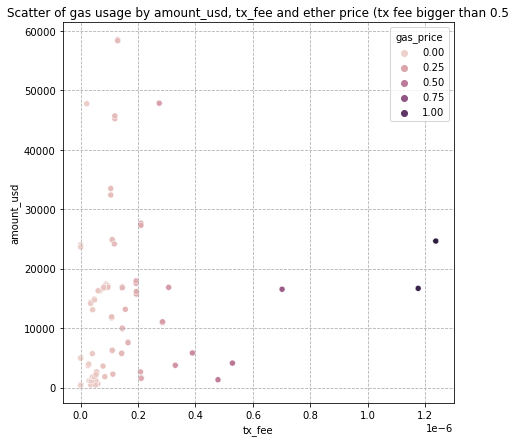

In [33]:
plt.figure(figsize=(7, 7))
sns.scatterplot(mevs_df[(mevs_df['tx_fee'] < 0.5) & (mevs_df['amount_usd'] > 300)]['tx_fee'], 
                mevs_df[(mevs_df['tx_fee'] < 0.5) & (mevs_df['amount_usd'] > 300)]['amount_usd'], 
                hue=mevs_df[(mevs_df['tx_fee'] < 0.5) & (mevs_df['amount_usd'] > 300)]['gas_price'])
plt.grid(True, linestyle='--')
plt.title('Scatter of gas usage by amount_usd, tx_fee and ether price (tx fee bigger than 0.5')
plt.show()

There are only some unique attackers that are ready to pay higher transaction fees. Those unique cases are going out of the distribution for most of the records and can be seen that some addresses are representing a big number of records. It means that most of the records belong to several addresses. To ensure that, further countplot will be done

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


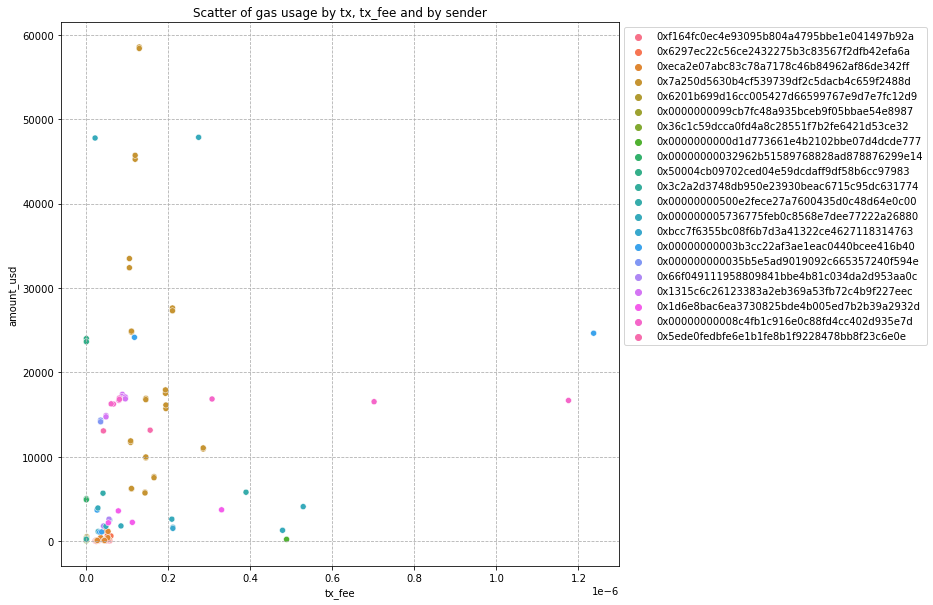

In [31]:
plt.figure(figsize=(10, 10))
sns.scatterplot(mevs_df[mevs_df['tx_fee'] < 0.5]['tx_fee'], 
                mevs_df[mevs_df['tx_fee'] < 0.5]['amount_usd'], 
                hue=mevs_df[mevs_df['tx_fee'] < 0.5]['sender'])
plt.grid(True, linestyle='--')
plt.title('Scatter of gas usage by tx, tx_fee and by sender')
plt.legend(loc=2, bbox_to_anchor=(1,1))
plt.show()

Only in unique cases attackers are willing to perform transaction with high gas usage and high transaction fees, demonstrating desire for most of the attackers to minimize their losses

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


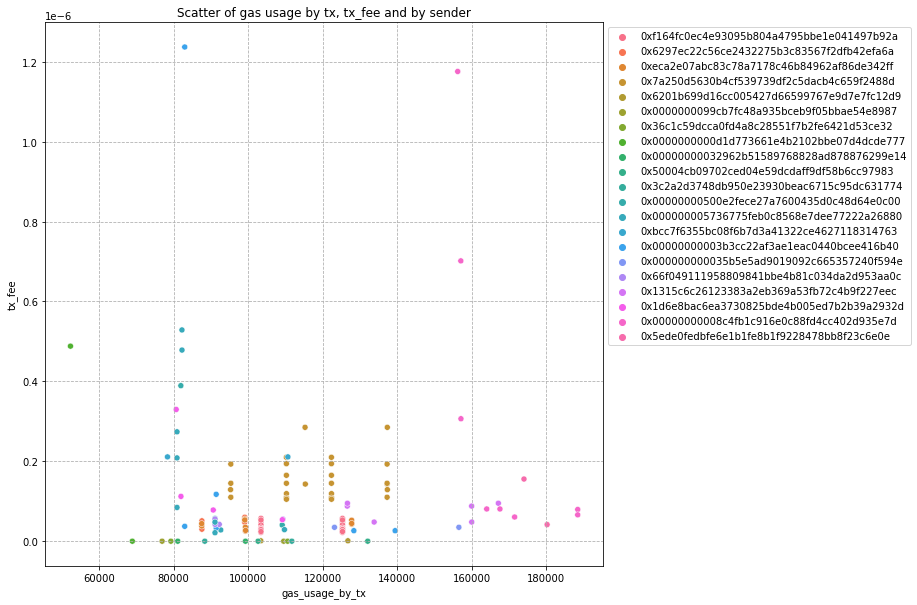

In [32]:
plt.figure(figsize=(10, 10))
sns.scatterplot(mevs_df[mevs_df['tx_fee'] < 0.5]['gas_usage_by_tx'], 
                mevs_df[mevs_df['tx_fee'] < 0.5]['tx_fee'], 
                hue=mevs_df[mevs_df['tx_fee'] < 0.5]['sender'])
plt.grid(True, linestyle='--')
plt.title('Scatter of gas usage by tx, tx_fee and by sender')
plt.legend(loc=2, bbox_to_anchor=(1,1))
plt.show()

<AxesSubplot:>

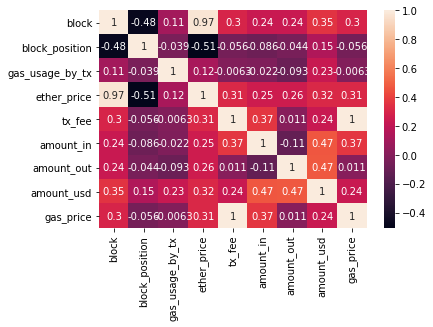

In [19]:
sns.heatmap(mevs_df[mevs_df['tx_fee'] < 1].corr(), annot=True)

In [20]:
mevs_df.sort_values(by=['block'], inplace=True)

In [21]:
mevs_df[mevs_df['tx_fee'] == 1]

,txd,block,block_position,gas_usage_by_tx,ether_price,tx_fee,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,gas_price,gas_used
89,0x74f7cea83af95572f0cf7cd5474d1901078ba3e718e5...,12359575,0,114568,3432.21,1.0,UST,mAAPL,43209.454253,317.740680,21920.836212,2021-05-03 06:24:21,0x1be0f4b9bbf312fdc9dfedff50aedce6f5035d51,0x1be0f4b9bbf312fdc9dfedff50aedce6f5035d51,1.000000e-18,500000
88,0x41f41ff7f1a99ee0c00035cc6c00ec4830d536eb68fc...,12359575,2,89876,3432.21,1.0,mAAPL,UST,317.740680,43951.751824,22297.415453,2021-05-03 06:24:21,0x1be0f4b9bbf312fdc9dfedff50aedce6f5035d51,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,1.000000e-18,6000000


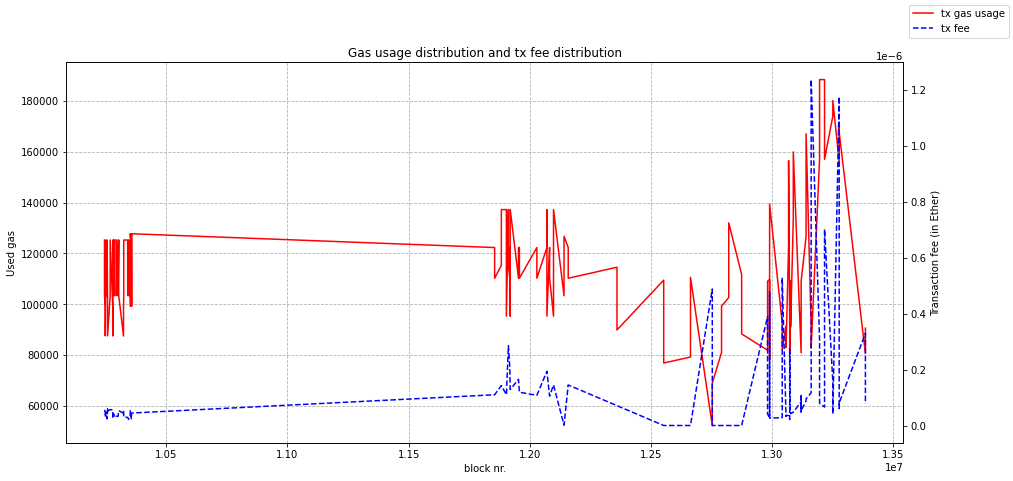

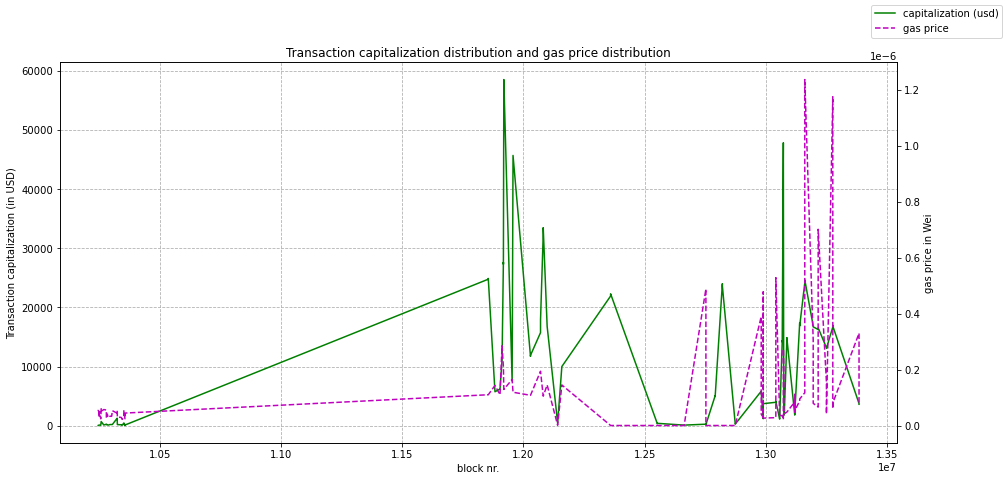

In [22]:
# gas usage and tx fee
fig, ax = plt.subplots(figsize=(15, 7))
ax2 = ax.twinx()

ax.plot(mevs_df['block'], mevs_df['gas_usage_by_tx'], color='r', label='tx gas usage')
ax2.plot(mevs_df[mevs_df['tx_fee'] != 1]['block'], mevs_df[mevs_df['tx_fee'] != 1]['tx_fee'], color='b', linestyle='--', label='tx fee')
ax.set_title('Gas usage distribution and tx fee distribution')
ax.set_xlabel('block nr.')
ax.set_ylabel('Used gas')
ax2.set_ylabel('Transaction fee (in Ether)')

ax.grid(True, linestyle='--')
fig.legend()
plt.show()


# capitalization and gas price
fig, ax = plt.subplots(figsize=(15, 7))
ax2 = ax.twinx()

ax.plot(mevs_df['block'], mevs_df['amount_usd'], color='g', label='capitalization (usd)')
ax2.plot(mevs_df['block'], mevs_df['gas_price'], color='m', linestyle='--', label='gas price')
ax.set_title('Transaction capitalization distribution and gas price distribution')
ax.set_xlabel('block nr.')
ax.set_ylabel('Transaction capitalization (in USD)')
ax2.set_ylabel('gas price in Wei')

ax.grid(True, linestyle='--')
fig.legend()
plt.show()

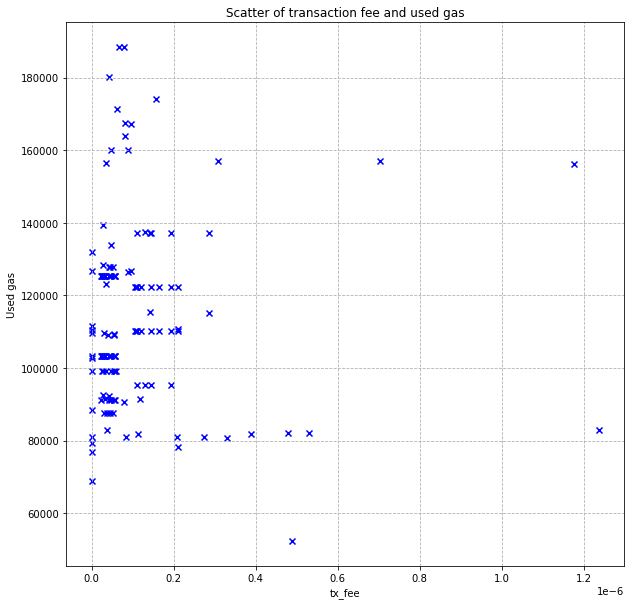

In [23]:
# gas usage plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(mevs_df[mevs_df['tx_fee'] != 1]['tx_fee'], 
           mevs_df[mevs_df['tx_fee'] != 1]['gas_usage_by_tx'], 
           marker='x', color='b')
ax.set_title('Scatter of transaction fee and used gas')
ax.set_xlabel('tx_fee')
ax.set_ylabel('Used gas')
ax.grid(True, linestyle='--')
plt.show()


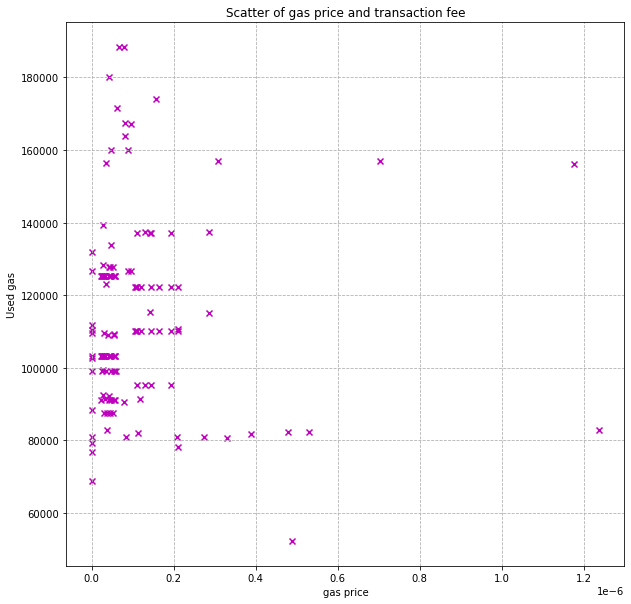

In [24]:
# gas usage plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(mevs_df[mevs_df['tx_fee'] != 1]['gas_price'], 
           mevs_df[mevs_df['tx_fee'] != 1]['gas_usage_by_tx'], 
           marker='x', color='m')
ax.set_title('Scatter of gas price and transaction fee')
ax.set_xlabel('gas price')
ax.set_ylabel('Used gas')
ax.grid(True, linestyle='--')
plt.show()


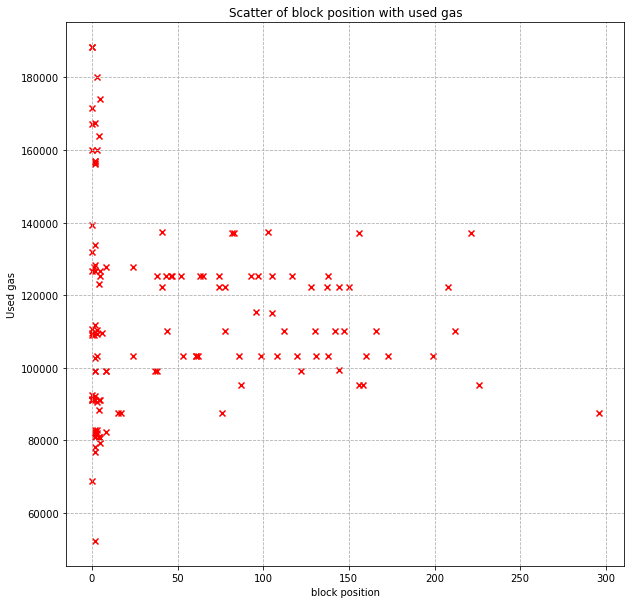

In [25]:
# gas usage plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(mevs_df[mevs_df['tx_fee'] != 1]['block_position'], 
           mevs_df[mevs_df['tx_fee'] != 1]['gas_usage_by_tx'], 
           marker='x', color='r')
ax.set_title('Scatter of block position with used gas')
ax.set_xlabel('block position')
ax.set_ylabel('Used gas')
ax.grid(True, linestyle='--')
plt.show()


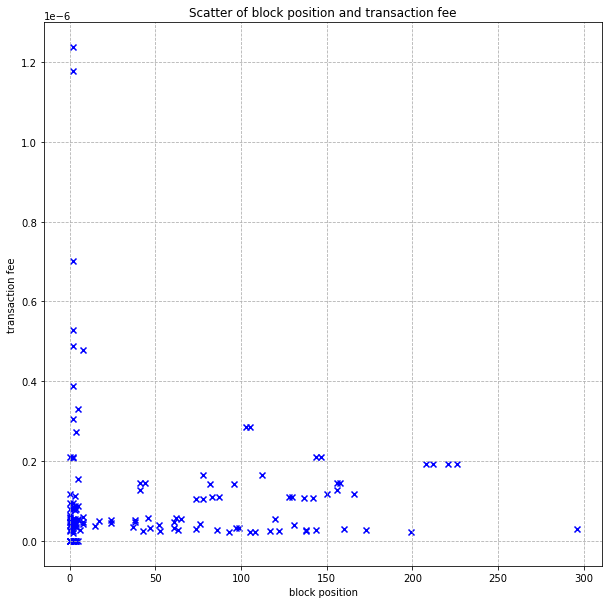

In [26]:
# gas usage plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(mevs_df[mevs_df['tx_fee'] != 1]['block_position'], 
           mevs_df[mevs_df['tx_fee'] != 1]['tx_fee'], 
           marker='x', color='b')
ax.set_title('Scatter of block position and transaction fee')
ax.set_xlabel('block position')
ax.set_ylabel('transaction fee')
ax.grid(True, linestyle='--')
plt.show()


In most of the cases, MEV transactions are the first and the third ones (which corresponds to the basic attack pattern), but there are some specific cases of attacks happening little later (till position 9). All values above 10-th position are more likely to be outliers.

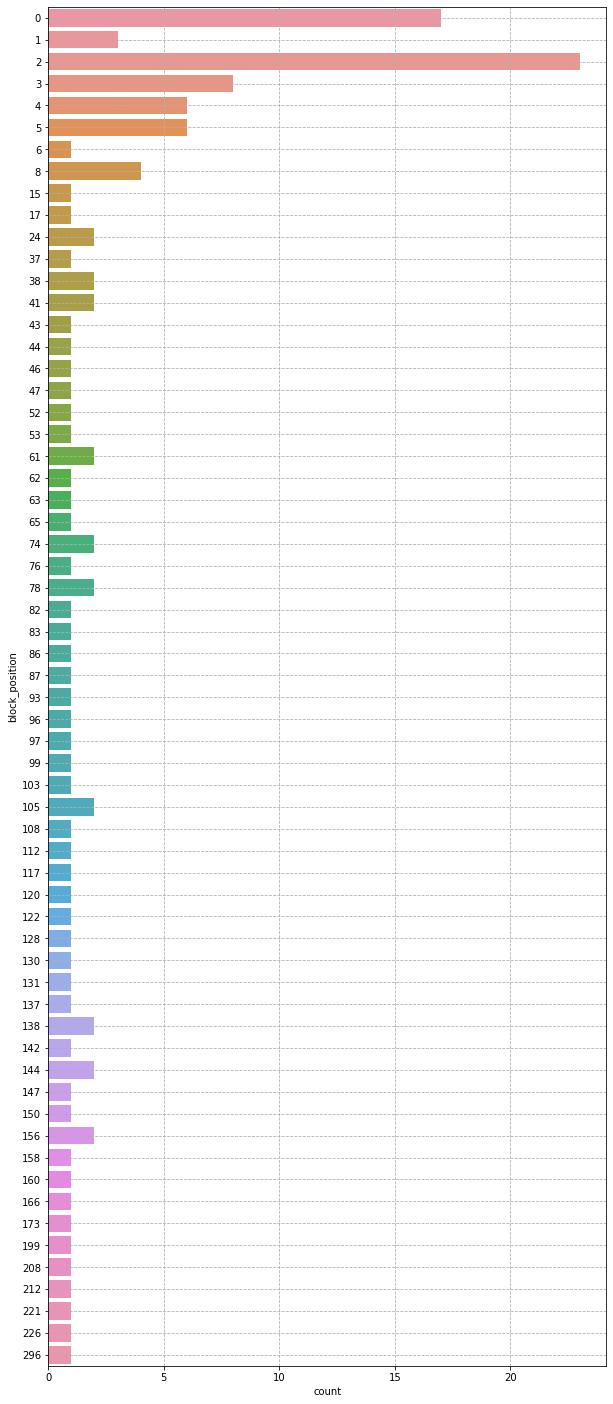

In [27]:
plt.figure(figsize=(10, 25))
sns.countplot(y='block_position', data=mevs_df)
plt.grid(True, linestyle='--')
plt.show()

There are transactions with extremely small capitalizations, reducing their likelihood of being MEV attacks and it is possible that in current case additional MEV values check is required to be performed.

In [28]:
print(fr'max capitalization registered after 9-th position in the block = {mevs_df[mevs_df["block_position"] > 9]["amount_usd"].max()}')
print(fr'min capitalization registered after 9-th position in the block = {mevs_df[mevs_df["block_position"] > 9]["amount_usd"].min()}')
print(fr'mean capitalization registered after 9-th position in the block = {mevs_df[mevs_df["block_position"] > 9]["amount_usd"].mean()}')
print(fr'median capitalization registered after 9-th position in the block = {mevs_df[mevs_df["block_position"] > 9]["amount_usd"].median()}')

max capitalization registered after 9-th position in the block = 58535.88556759252
min capitalization registered after 9-th position in the block = 21.150433089502076
mean capitalization registered after 9-th position in the block = 9243.476250151884
median capitalization registered after 9-th position in the block = 348.6681455300943


There are several addresses with around 10-13 MEV attacks performed on the STO tokens pools. There is a small amount of addresses and can be seen that compared to the previous classic tokens case interest from attackers is lower.

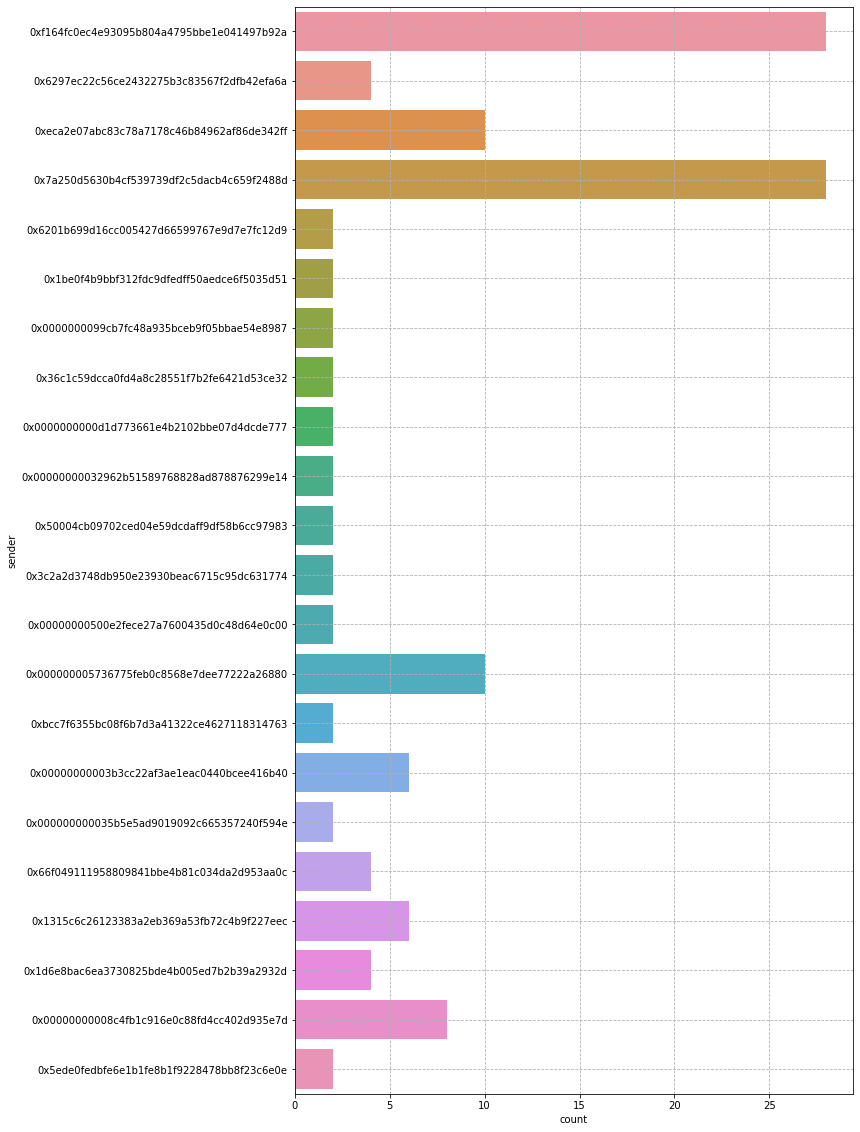

In [29]:
fig = plt.figure(figsize=(10, 20))
sns.countplot(y='sender', data=mevs_df)
plt.grid(True, linestyle='--')
plt.show()